In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Datan valmistelu
df = pd.read_excel('http://taanila.fi/data1.xlsx', sheet_name='Data')

#Annetaan koulutukselle ja perhesuhteelle tekstiarvo sekä vaihdetaan muuttujien nimiä
df['koul_text'] = df['koulutus'].replace({1:'Peruskoulu', 2:'2.aste', 3:'Korkeakoulu', 4:'Ylempi korkeakoulu'})
df['perhe_text'] = df['perhe'].replace({1:'Perheetön', 2:'Perheellinen'})
df['sukup_text'] = df['sukup'].replace({1:'Mies', 2:'Nainen'})

df.rename(columns={'palveluv':'työv', 'kuntosa':'sali', 'lomaosa':'osake'}, inplace=True)
df.head()

,nro,sukup,ikä,perhe,koulutus,työv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,osake,sali,hieroja,koul_text,perhe_text,sukup_text
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,Peruskoulu,Perheetön,Mies
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,2.aste,Perheellinen,Mies
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,Peruskoulu,Perheetön,Mies
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,Peruskoulu,Perheellinen,Mies
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,2.aste,Perheetön,Mies


In [3]:
#Lukumäärien ja prosenttien laskenta ja esittäminen

#Tallennetaan muuttujien tekstimuotoiset arvot lista-muuttujiin
koulutusLista = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perheLista = ['Perheetön', 'Perheellinen']
sukupLista = ['Mies', 'Nainen']
tyytyväisyysLista = ['Erittäin tyytymätön','Jokseenkin tyytymätön', 
                'Ei tyytymätön eikä tyytyväinen','Jokseenkin tyytyväinen','Erittäin tyytyväinen']

In [5]:
#Onko palkkatyytyväisyydessä eroja miesten ja naisten välillä?

dfn=df.groupby('sukup')['palkkat'].count()

df1 = pd.crosstab(df['palkkat'], df['sukup'], normalize='columns')
df1.index = tyytyväisyysLista

mies='Mies (n='+str(dfn[1])+')'
nainen='Nainen (n='+str(dfn[2])+')'
df1.columns = [mies, nainen]

(df1*100).style.format('{:.1f}%')

,Mies (n=63),Nainen (n=19)
Erittäin tyytymätön,50.8%,5.3%
Jokseenkin tyytymätön,19.0%,36.8%
Ei tyytymätön eikä tyytyväinen,19.0%,36.8%
Jokseenkin tyytyväinen,11.1%,15.8%
Erittäin tyytyväinen,0.0%,5.3%


[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %')]

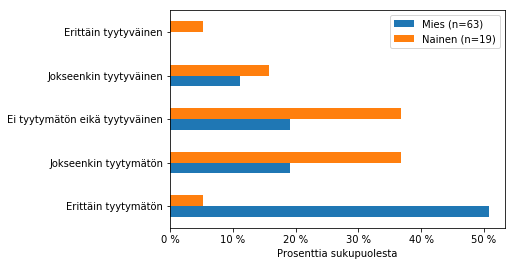

In [6]:
#havainnot esitettynä pylväsdiagrammina
ax = df1.plot.barh()
plt.xlabel('Prosenttia sukupuolesta')

ax.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax.get_xticks()])

In [9]:
#Vaikuttaako palkan suuruus(luokiteltuna) palkkatyytyväisyyteen

bins = [1000, 2000, 3000, 4000, 7000]
df['palkkaluokka'] = pd.cut(df['palkka'], bins = bins)

df2 = pd.crosstab(df['palkkat'], df['palkkaluokka'], normalize='columns')
df2.index = tyytyväisyysLista

(df2*100).style.format('{:.1f}%')

palkkaluokka,"(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 7000]"
Erittäin tyytymätön,47.4%,42.0%,37.5%,0.0%
Jokseenkin tyytymätön,31.6%,20.0%,12.5%,40.0%
Ei tyytymätön eikä tyytyväinen,21.1%,26.0%,25.0%,0.0%
Jokseenkin tyytyväinen,0.0%,10.0%,25.0%,60.0%
Erittäin tyytyväinen,0.0%,2.0%,0.0%,0.0%


[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

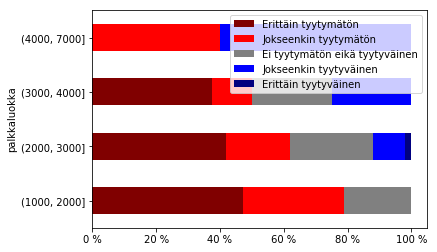

In [11]:
#edellinen esitettynä kuviona
ax1 = df2.transpose().plot.barh(stacked = True, color=['maroon','red','gray','blue','navy'])

ax1.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax1.get_xticks()])